#Explainable Machine Learning --- Homework 4
##*Grzegorz Gruza, 417923*

#**Report**

##Task A

###Dataset
The project is conducted on the wine_quality dataset, which contains information about wines along with an indication of whether the wines are considered good (value 1) or bad (value -1).

###Model
The analyzed model is a random forest from the sklearn library. The hyperparameters of the model are the default values of the RandomForestClassifier() initialization method.

###Predictions on 2 observations
Two random samples are selected from the training set. One comes from a subset with a targe equal to 1 and one from a subset with a targe equal to -1. Below are these samples, predictions and ground truth.

 No | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |10| pred | gt
 ---|---|---|---|---|---|---|---|---|---|---|--|------|---
772 |6.6 |0.21 |0.60 |1.10 |0.135 |61.0 |44.0 |0.9927 |3.12 |0.39 |9.3|-1|-1
1739|8.4 |0.29 |0.29 |1.05 |0.032 |4.0 |55.0 |0.9908 |2.91 |0.32 |11.4|1|1


###SHAP values
For the two selected samples, prediction decompositions were determined using SHAP from two different libraries: `dalex` and `shap`. The results can be found below.

As we can see, these examples satisfy the conditions of both the 4th and 5th points of the task, because:
* the first example has the highest absolute values for the parameters "5", "6", while the second example - for the parameters "1" and "4".
* the attribute "1" has a positive contribution for the first sample, and a negative contribution for the second.


**dalex**

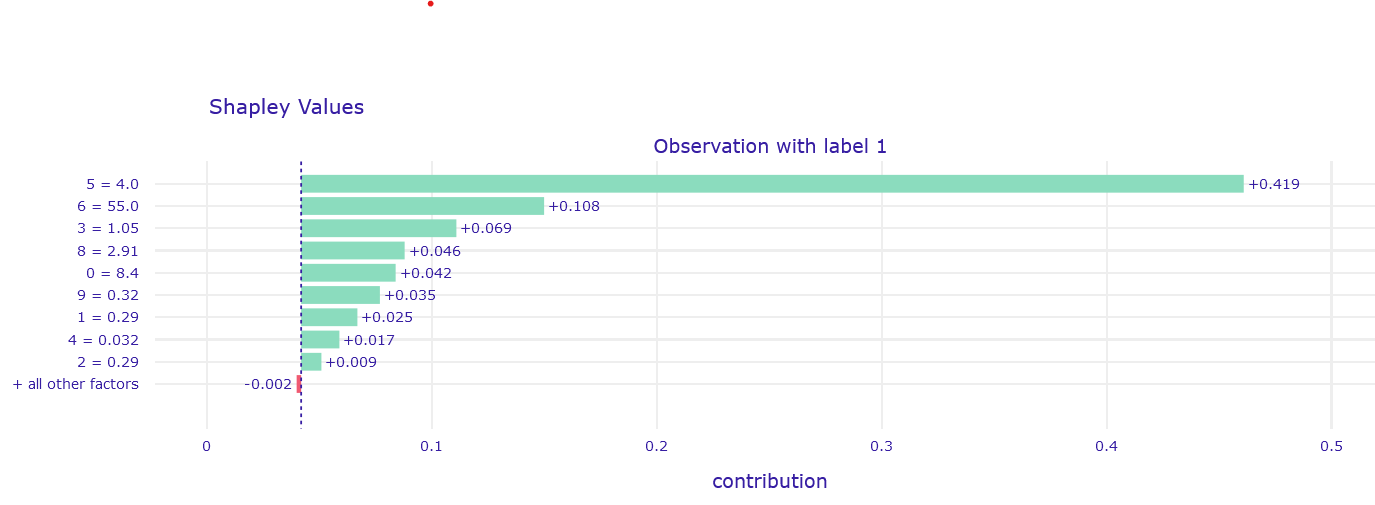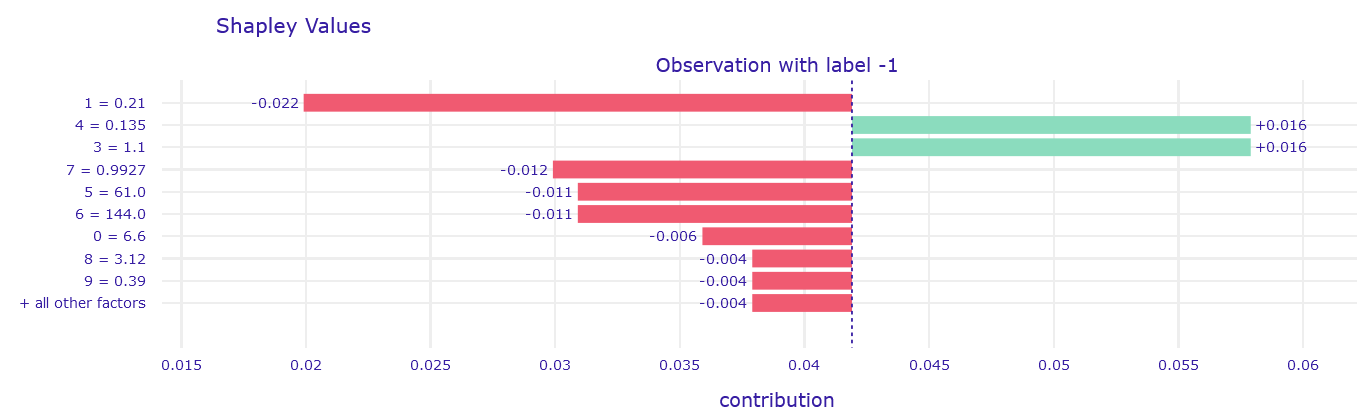

**shap**

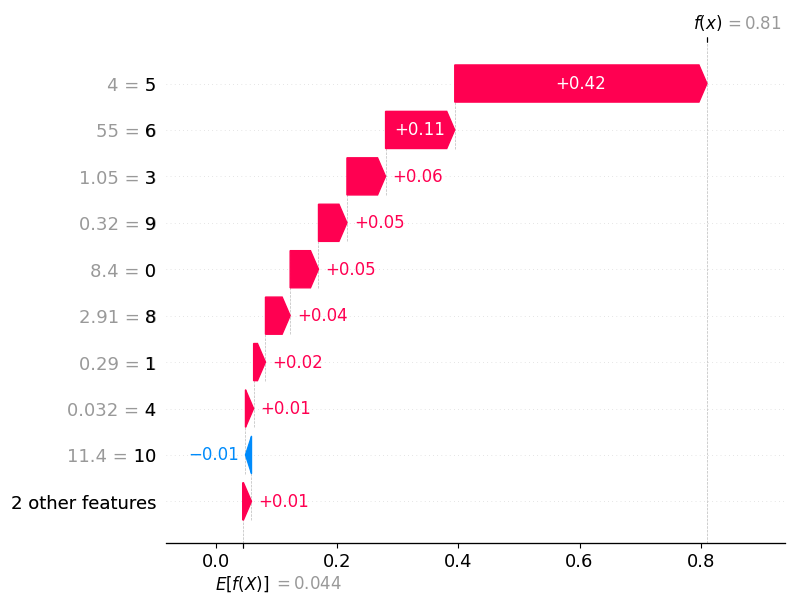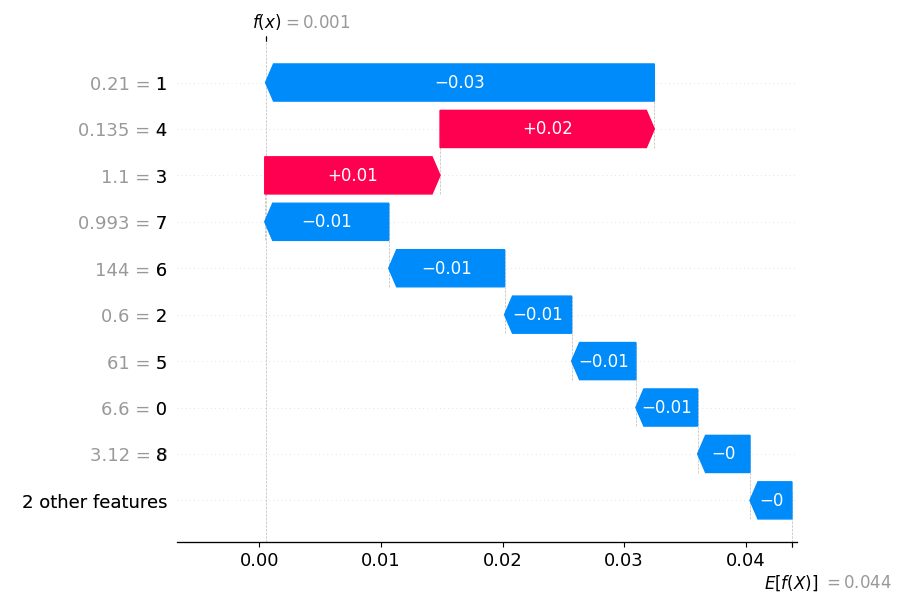

###Differences between dalex and shap
On the selected samples, there are no significant differences between the two implementations. All the most relevant attributes have a similar contribution in both cases and a similar contribution sign.

###Linear model
For comparison with a random forest, a logistic regression was trained. Below are the SHAP results for the implementation from the 'shap' library. As you can see, they differ significantly in attribute contribution. The attributions have very large values, suggesting that in this case SHAP performs poorly for logistic regression, and its translations are very haotic.

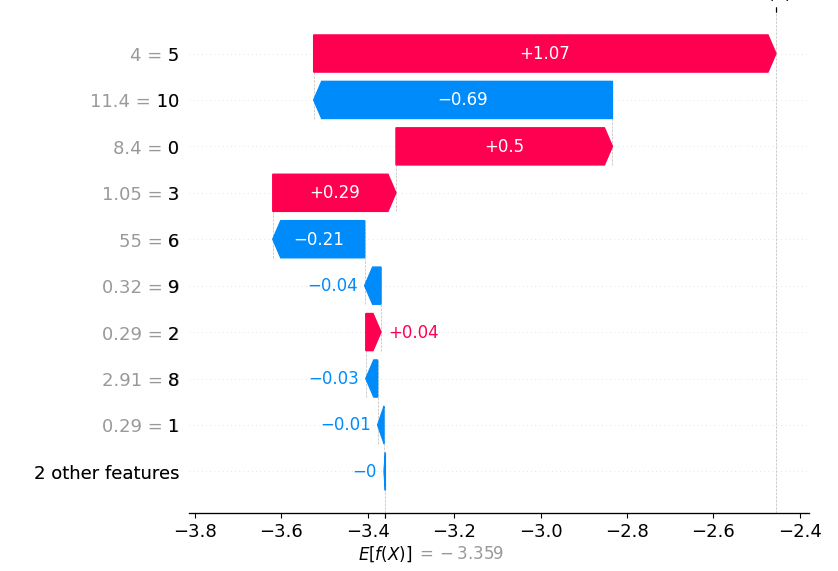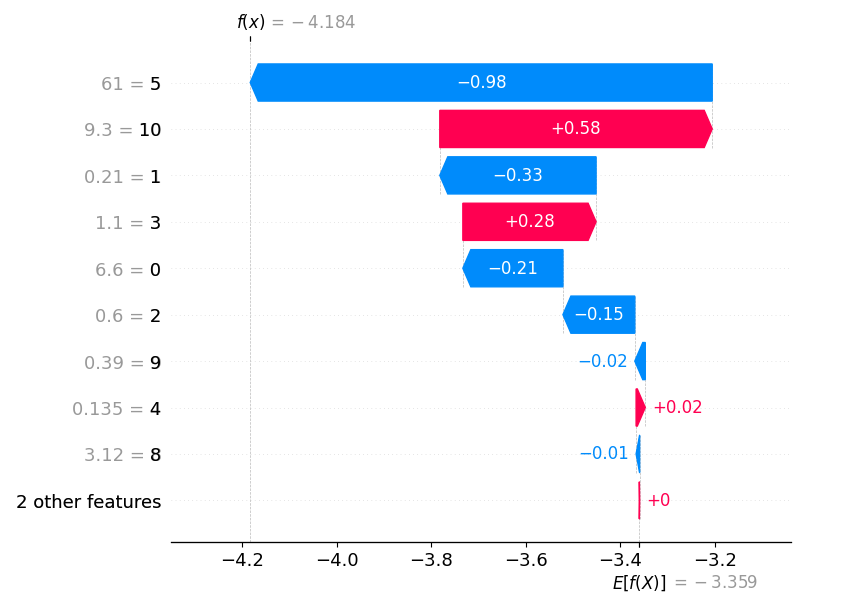

##Task B

Shapley values for player A is equal to **25.0**.

#**Appendix**

##Task A

###Configuration


In [32]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.cuda.get_device_name()
    print(f'GPU: {device}')
    DEVICE = 'cuda'
else:
    print('No GPU available, using CPU.')
    DEVICE = 'cpu'

GPU: Tesla T4


In [33]:
!wget https://raw.githubusercontent.com/adrianstando/imbalanced-benchmarking-set/main/datasets/wine_quality.csv

--2023-11-09 22:01:52--  https://raw.githubusercontent.com/adrianstando/imbalanced-benchmarking-set/main/datasets/wine_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315368 (308K) [text/plain]
Saving to: ‘wine_quality.csv’

wine_quality.csv    100%[===================>] 307.98K  --.-KB/s    in 0.03s   

2023-11-09 22:01:53 (10.7 MB/s) - ‘wine_quality.csv’ saved [315368/315368]



###Dataset

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('wine_quality.csv')
df = df.head(2048)

print(df.head())
df = df.dropna()
X = df.drop(['TARGET', 'Unnamed: 0'], axis=1)  # Features, ids
y = df['TARGET']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("Shapes of the sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

   Unnamed: 0    0     1     2     3      4     5      6       7     8     9  \
0           0  7.0  0.27  0.36  20.7  0.045  45.0  170.0  1.0010  3.00  0.45   
1           1  6.3  0.30  0.34   1.6  0.049  14.0  132.0  0.9940  3.30  0.49   
2           2  8.1  0.28  0.40   6.9  0.050  30.0   97.0  0.9951  3.26  0.44   
3           3  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   
4           4  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   

     10  TARGET  
0   8.8      -1  
1   9.5      -1  
2  10.1      -1  
3   9.9      -1  
4   9.9      -1  
Shapes of the sets:
X_train: (1433, 11)
X_test: (615, 11)
y_train: (1433,)
y_test: (615,)


###Model - random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

###Predictions on 2 observations

In [36]:
import random
import numpy as np
np.random.seed(3)

In [37]:
labels = [-1,1]
sampled_indexes = [
    random.choice(list(np.where(y_train.values == label)[0]))
    for label in labels
]
sampled_obs = X_train.iloc[sampled_indexes]
predictions = rf_model.predict(sampled_obs)
ground_truth = [y_train.iloc[sampled_indexes[i]] for i in range(2)]

In [38]:
display(sampled_obs)
print(f'predictions: {predictions}')
print(f'ground truth: {ground_truth}')

,0,1,2,3,4,5,6,7,8,9,10
772,6.6,0.21,0.60,1.10,0.135,61.0,144.0,0.9927,3.12,0.39,9.3
1739,8.4,0.29,0.29,1.05,0.032,4.0,55.0,0.9908,2.91,0.32,11.4


predictions: [-1  1]
ground truth: [-1, 1]


###SHAP

####SHAP with dalex package


In [39]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1045993 sha256=8d18df32a921001f8ff8df017de7a4fa90e10282b320a11539aab1719f9c863e
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [40]:
import dalex as dx
explainer_dx = dx.Explainer(rf_model, X_train, y_train, predict_function = lambda m, df: m.predict_proba(df)[:, 1])
explainer_dx.model_performance()

Preparation of a new explainer is initiated

  -> data              : 1433 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1433 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function <lambda> at 0x7eef25758dc0> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.0419, max = 0.97
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.29, mean = -0.957, max = 0.48
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,recall,precision,f1,accuracy,auc
RandomForestClassifier,1.0,1.0,1.0,1.0,0.476735


In [41]:
shap_values_dalex = [explainer_dx.predict_parts(sampled_obs.iloc[i], type="shap", label=f'Observation with label {labels[i]}') for i in range(len(sampled_obs))]

In [56]:
for i in range(len(sampled_obs)):
    shap_values_dalex[i].plot()

####SHAP with shap package

In [43]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.2 MB/s eta 0:00:00


In [44]:
import shap
explainer_shap = shap.Explainer(rf_model, X_train, model_output='probability')

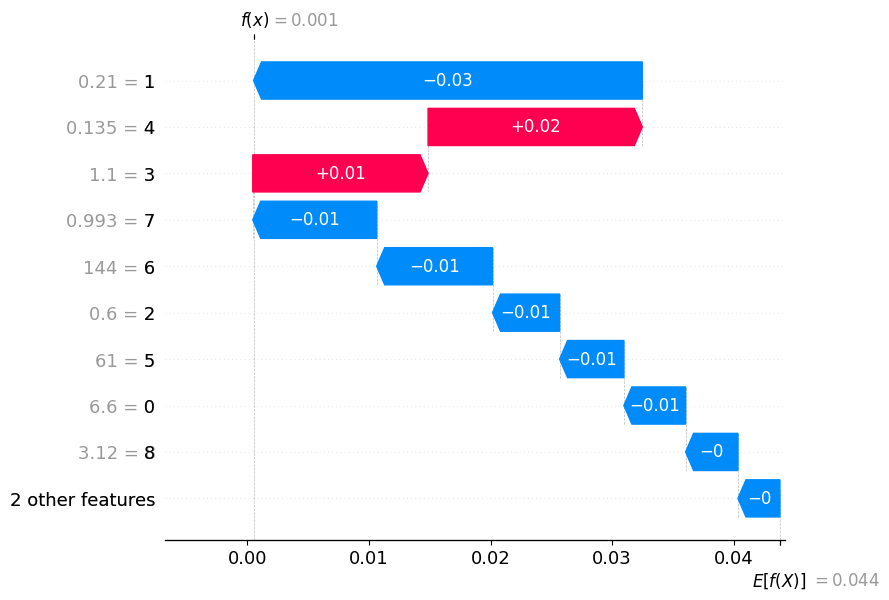

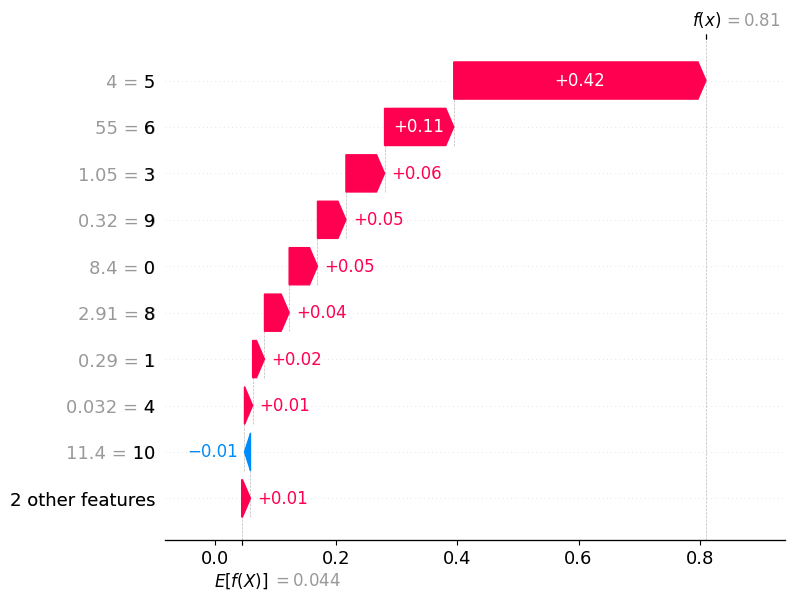

In [45]:
shap_values = explainer_shap(sampled_obs)
for i in range(len(sampled_obs)):
    shap.plots.waterfall(shap_values[i, :, 1])

###Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

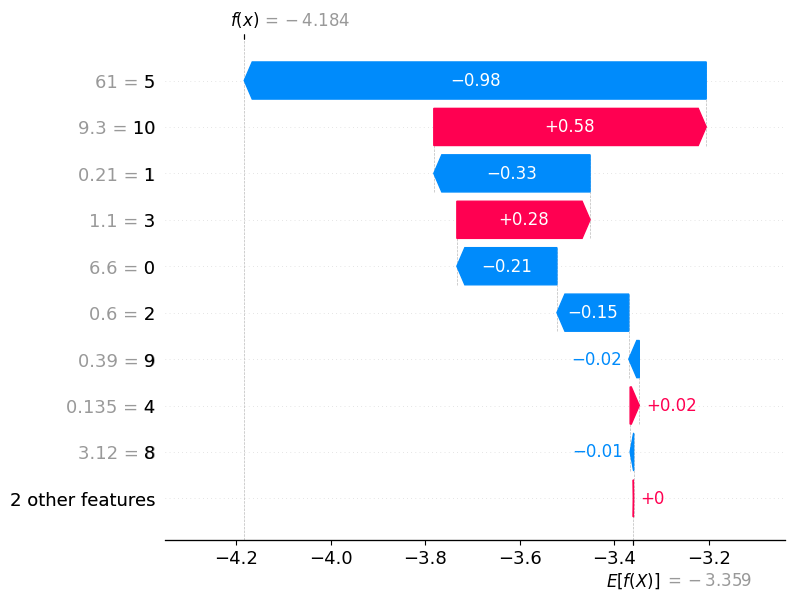

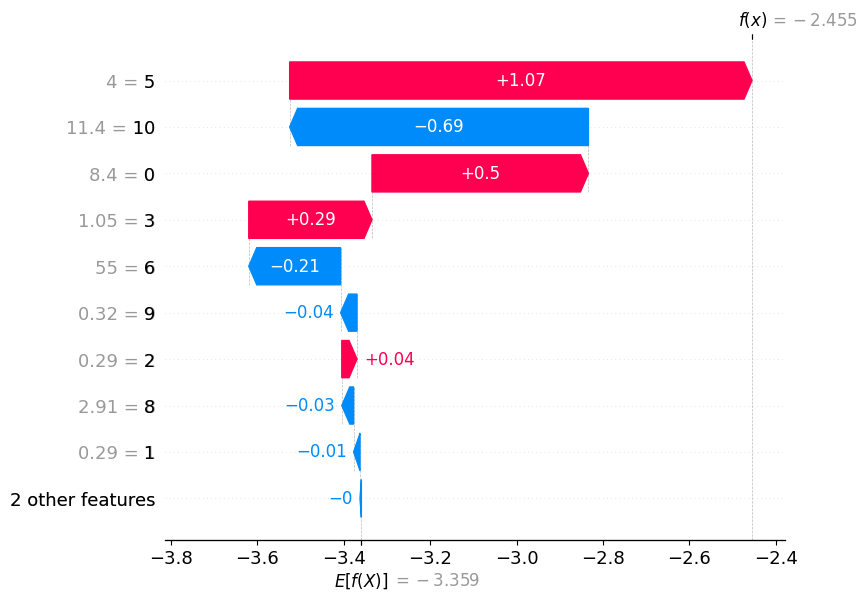

In [47]:
explainer_shap_lr = shap.Explainer(lr_model, X_train, model_output='probability')
shap_values_lr = explainer_shap_lr(sampled_obs)
for i in range(len(sampled_obs)):
    shap.plots.waterfall(shap_values_lr[i])

##Task B

In [48]:
from itertools import chain, combinations

def powerset(elements):
    return chain.from_iterable(combinations(elements, length) for length in range(len(elements)+1))

list(powerset(['a', 'b', 'c']))

[(),
 ('a',),
 ('b',),
 ('c',),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'c'),
 ('a', 'b', 'c')]

In [49]:
import math

def shalpey_value(player, players, coaliction_val_dict):
    N = len(players)
    players.remove(player)
    coalitions_without = powerset(players)

    shapley_value = 0
    for coalition_without in coalitions_without:
        S = len(coalition_without)
        coalition_value_without = coaliction_val_dict[coalition_without]
        coalition = tuple(sorted(coalition_without + (player,)))
        coalition_value = coaliction_val_dict[coalition]
        shapley_value += (coalition_value - coalition_value_without) * math.factorial(S) * math.factorial(N-S-1)
    shapley_value /= math.factorial(N)
    return shapley_value

In [50]:
a, b, c = 'a', 'b', 'c'
players = [a, b, c]
coaliction_val_dict = {
    (): 0,
    (a,): 20,
    (b,): 20,
    (c,): 60,
    (a, b): 60,
    (a, c): 70,
    (b, c): 70,
    (a, b, c): 100,
}
print(shalpey_value(a, players, coaliction_val_dict))

25.0
